<h3>NAIVE BAYES IMPLEMENTATION ON MNIST DATASET</h3>

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time

In [30]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
data=np.zeros([70000,784])
data[:60000,:]=x_train; data[60000:,:]=x_test
label=np.zeros(70000)
label[:60000]=y_train; label[60000:]=y_test

In [22]:
def naive_bayes(data,label):
    n_s,n_f=data.shape          #Find the Shape (Samples,Features) of the data
    classes=np.unique(label)    #Find the Unique Classes in the Data
    n_c=len(classes)            #Number of Classes in the Data
    total_data=np.zeros([n_s,n_f+1]) #Create a Zero Matrix with (Samples,Feature+1) dimensions
    total_data[:,:-1]=data           #Save the samples & features in the total_data matrix
    total_data[:,-1]=label           #Save the Labels in the total_data matrix
    np.random.shuffle(total_data)    #Shuffle the total_data Matrix (Sample & Label) are sampled together
    trainX=total_data[:60000,:]      #Train Data is taken from total Data
    np.random.shuffle(trainX)        #Train Data is shuffled once again        
    testX=total_data[60000:,:]       #Test Data is taken from Total Data
    np.random.shuffle(testX)         #Test Data is shuffled once again
    testX_c=testX[:,:-1]             #Take the samples and feature from Test Data
    testX_l=testX[:,-1]              #Take the labels from Test Data
    mean_v=np.zeros([n_c,n_f])       #Take a Zero Matrix that will be used to store the mean of Features wrt classes
    var_v=np.zeros([n_c,n_f])        #Take a Zero Matrix that will be used to store the variance of Features wrt classes
    c_prob=[]                        #list to store P(class)
    confusion_matrix=np.zeros([n_c,n_c]) #Take a Zero Matrix for Confusion MAtrix of size (classes*classes)
    d_acc=[]                         #Take a list that will save each class(digit) accuracy
    
    for c in classes:
        trainX_c=trainX[trainX[:,-1]==c]   #Filter samples for each class
        trainX_c=trainX_c[:,:-1]           #
        c_prob.append(len(trainX_c)/len(trainX))
        mean_v[int(c),:]=trainX_c.mean(axis=0)#Find mean of each class & save in corresonding mean matrix
        var_v[int(c),:]=trainX_c.var(axis=0)#Find variance of each class & save in corresonding mean matrix
    
    var_v=var_v+1000    #Since variance is 0 for many pixels, we need to add some value to the variance. 
                        #Adding 1000 gives one of the best accuracies
    count=0             
    
    for i in range(testX.shape[0]):
        lists=[]   #Empty list to store probability of all class for ith sample feature 
        for j in range(n_c):
            numerator=np.exp(-((testX_c[i]-mean_v[j])**2)/(2*var_v[j])) 
            denominator=np.sqrt(2*np.pi*(var_v[j]))
            prob_xc=numerator/denominator
            ratio=np.sum(np.log(prob_xc)) #Probability of jth class for ith feature
            #We found that all classes have equal counts and P(c) for all class is equal provides better accuracy.
            #The line below can be uncommented to use the original formula
            #ratio=np.sum(np.log(prob_xc)+np.log(c_prob[j]))
            lists.append(ratio) #Append Probability of jth class for ith feature 
        
        pred=lists.index(max(lists)) #Take y predicted for the classthat has the maximum probability for jth feature vector
        if pred == testX_l[i]: 
            count=count+1 #If y_predicted equals true y label,count is incremented
            confusion_matrix[int(testX_l[i])][int(testX_l[i])]=confusion_matrix[int(testX_l[i])][int(testX_l[i])]+1
            #Values in corresponding confusion matrix is appended
        else:
            for k in range(n_c):
                if pred == k:
                    confusion_matrix[int(testX_l[k])][int(testX_l[i])]=confusion_matrix[int(testX_l[k])][int(testX_l[i])]+1
                    #Values in corresponding confusion matrix is appended
    for l in classes:
        check=testX[testX[:,-1]==l] #Filter features for each class
        a=(confusion_matrix[int(l)][int(l)])/check.shape[0] #Find accuracy of each digit
        d_acc.append(a)   #Append individual digit accuracy
    

    o_acc=count/testX.shape[0] #Find overall Accuracy
    return(d_acc,o_acc,confusion_matrix,mean_v,var_v)
    #Return (Digit Accuracy,Overall Accuracy,Confusion Matrix,Mean & Variance)        

In [23]:
#Call Naive Bayes Function
(digit_accuracy,overall_accuracy,matrix,mean_v,var_v)=naive_bayes(data,label)

In [24]:
#Print All class Accuracy
digit=['0', '1', '2', '3', '4', '5', '6','7','8','9']
naive_df = pd.DataFrame(list(zip(digit, digit_accuracy)), columns =['Digit','Digit Accuracy']) 
print('Digit (Individual Class) Accuracy of the Samples:')
naive_df

Digit (Individual Class) Accuracy of the Samples:


,Digit,Digit Accuracy
0,0,0.908266
1,1,0.958444
2,2,0.754032
3,3,0.770833
4,4,0.687631
5,5,0.642015
6,6,0.924335
7,7,0.922857
8,8,0.747951
9,9,0.913793


We can see accuracy of most of the classes to be pretty good except a few classes(like 4 & 5). As we can see from the confusion matrix that for class 5, many of the predictions are done as 6,4 and 7 instead of 5. It can happen due to the assumption we made in the problem, where we considered probability of each class is equal. But if we look at the data set we can find that we don't have equal number of classes in the label column. 

In [25]:
#Print Overall Accuracy
print('Overall Accuracy of Naive Bayes Model: '+str(overall_accuracy))
overall_accuracy

Overall Accuracy of Naive Bayes Model: 0.8069


0.8069

We can see that inspite of all the assumptions we made in Naive-Bayes classifier (like independent features and probabilities of classes to be equal) we have got a satisfactory overall accuracy.

One more noticeable aspect of our naive-bayes model is that as we increase the value of variance, we see an increase in overall and each digit's classification accuracy. We needed to add some value to the variance because a number of the variance obtained had initial values as 0.

The given pictures of means and variances of the 10 classes can help us understand how the given classifier works. Each class's mean of the image tells us what the class looks like, and the variance image of each class (shown below) shows us a boundary on the digits which signifies how much the digit thickness varies from the mean. We use the given test feature row in the gaussian distribution formula along with the mean and variance value obtained for each class. Thus if the feature is of the same class as that of the mean, we get the maximum value of probability for that class.

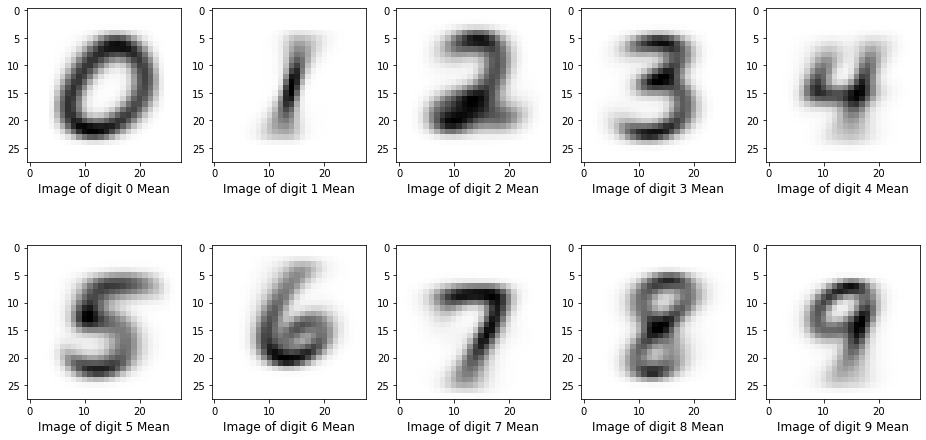

In [26]:
#Print Mean of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(mean_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = mean_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Mean',fontsize = 12)

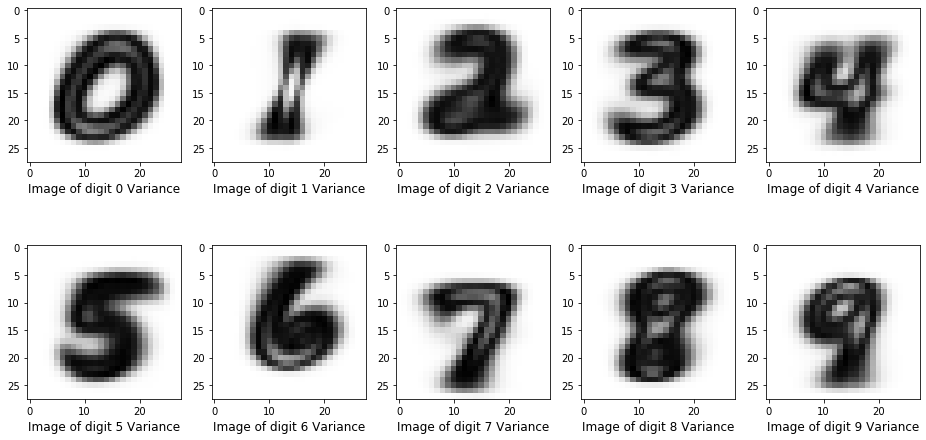

In [27]:
#Print Variance of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(var_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = var_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Variance',fontsize = 12)

Text(141.0, 0.5, 'Predicted class value')

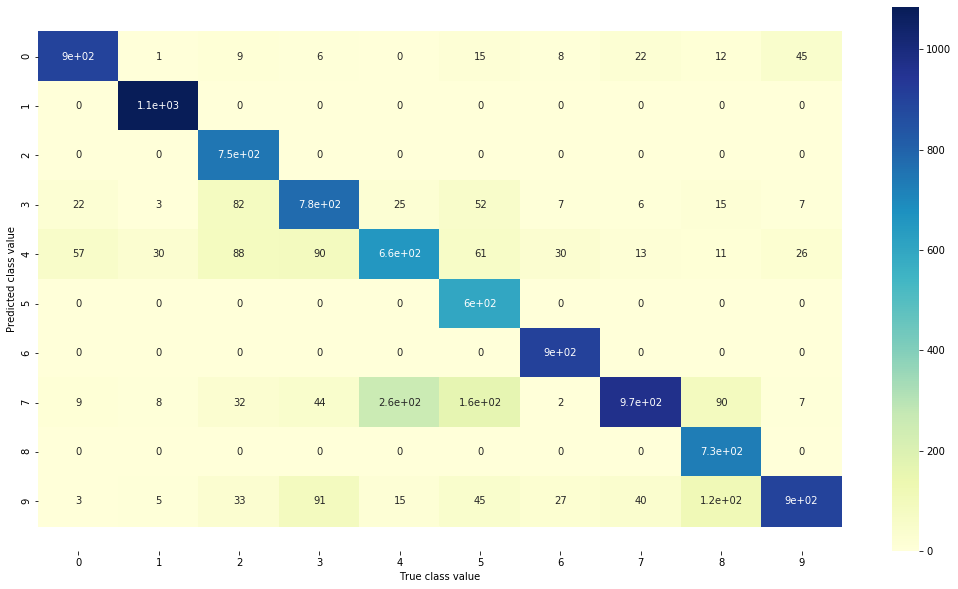

In [28]:
#Print Confusion Matrix
import seaborn as sns
plt.figure(figsize=(18,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')

The above figure shows the confusion matrix of the Naive-Bayes classifier. The horizontal axis represents the True class value and the vertical axis represents the Predicted class value. The predicted value axis holds the count of different values (from 0 to 9) compared to their respective true values. 